In [152]:
# 1. Name each sheet/table so they are meaningful standalone.
import os
os.chdir('C:/Users/ANKIT JAIN') # moving path to where data files are
# 1. Rename file
path = os.getcwd() # getting current working directory
os.rename(path+r'\Lodestone\sheetA.csv', path+r'\Lodestone\grill_type.csv') # changing SheetA
os.rename(path+r'\Lodestone\SheetB.csv', path+r'\Lodestone\grillTypePerformance.csv') # changing SheetB
os.rename(path+r'\Lodestone\SheetC.csv', path+r'\Lodestone\grillTypeTasteTest.csv') # changing SheetC

<AxesSubplot:xlabel='grill_type'>

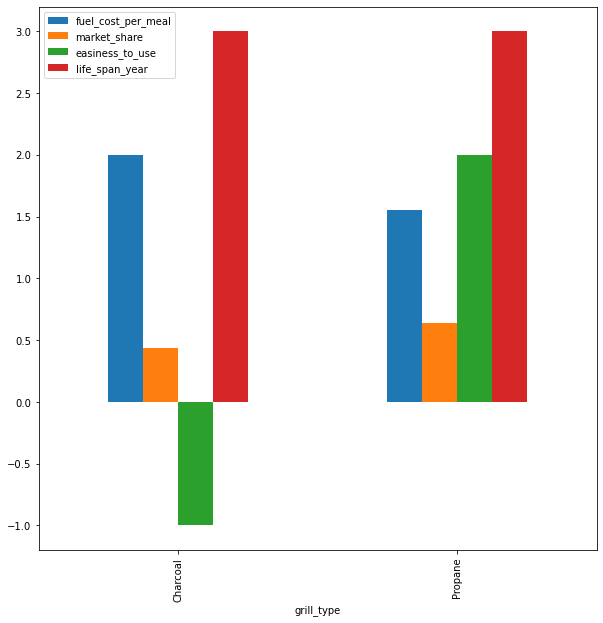

In [184]:
df1 = pd.read_csv('grill_type.csv') # reading the file using pandas
# plotting grill type vs all other attributes in SheetA
df1.plot(x="grill_type", y=["fuel_cost_per_meal", "market_share", "easiness_to_use", "life_span_year"],
        kind="bar", figsize = (10, 10))

<AxesSubplot:xlabel='grill_type'>

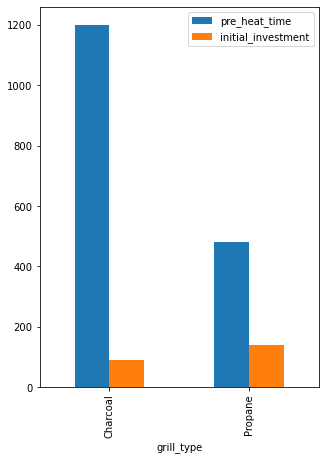

In [186]:
# plotting grill type vs pre_heat_time and initial_investment
df1.plot(x="grill_type", y=["pre_heat_time", "initial_investment"], kind="bar", figsize = (5, 7))

In [187]:
# 2. Which grill type is more fuel efficient based on sheet A?
import pandas as pd
import matplotlib.pyplot as plt
os.chdir('C:/Users/ANKIT JAIN/Lodestone') # moving to the file directory with all files 
df1.loc[df1['fuel_cost_per_meal'] == min(df1['fuel_cost_per_meal']),'grill_type'] # finding the minimum fuel_cost_per_meal

# Visualization can be found on 1st graph for visual proof

1    Propane
Name: grill_type, dtype: object

In [154]:
# 3. Which grill type has more market share?
df1.loc[df1['market_share'] == max(df1['market_share']),'grill_type'] # finding maximum market share for a grill type
# Visualization can be found on 1st graph for visual proof

1    Propane
Name: grill_type, dtype: object

In [211]:
# 4. Based on the cookoff data which grill type cost more fuel on a long run?
df2 = pd.read_csv('grillTypePerformance.csv')
test = df2.groupby('grill_type').sum()['fuel_cost'] # grouping SheetB o grill type and summing fuel_cost for each grill type
test = test.reset_index()
test

# We saw in part2, that the overall fuel_cost_per_meal is lesser for propane.

# We can see, that Propane is the clearly a better choice.
# **Note**: As seen in the video though, propane gas needs to be used a lot lot more than charcoal to be able to get 
# a value of 1.55 which is very rare as per the use by average Americans. So, based on data, it is propane, but based on
# actual use, and practicality, we might use charcoal.

,grill_type,fuel_cost
0,Charcoal,4570.681
1,Propane,1897.300


<AxesSubplot:xlabel='grill_type', ylabel='fuel_cost'>

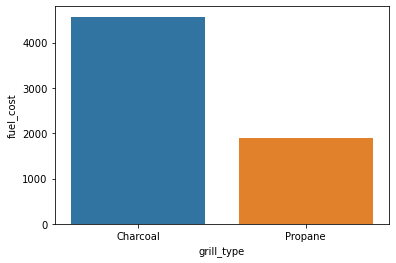

In [201]:
# Part 4 Visualization Code
import seaborn as sns
sns.barplot(x='grill_type', y='fuel_cost', data=test)

,grill_type,item_material,fuel_cost
0,Charcoal,Ground Beef Patty,1592.229
1,Charcoal,Hotdog,1476.880
2,Charcoal,Veggie Patty,1501.572
3,Propane,Ground Beef Patty,686.775
4,Propane,Hotdog,605.950
5,Propane,Veggie Patty,604.575


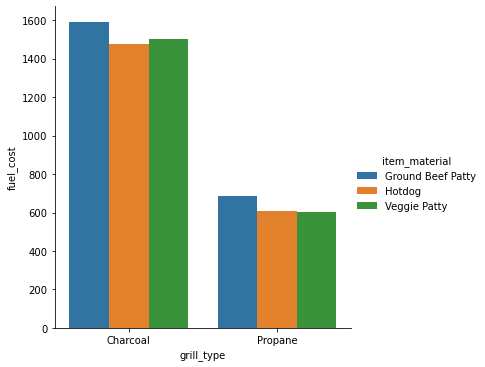

In [205]:
# fuel cost visualization based on each grill type for each item_material
test2 = df2.groupby(['grill_type', 'item_material']).sum()['fuel_cost']
test2 = test2.reset_index()
sns.catplot(data=test2, x='grill_type', y='fuel_cost', hue = 'item_material', kind='bar')
test2

In [ ]:
# 5. Considering that the average American grill owner buys a new grill every three years, which grill type
# would cost more based on the fuel cost and initial investment?
"""
Considering that the average American grill owner buys a new grill every three years, which grill type
would cost more based on the fuel cost and initial investment?
Considering the data given, we have 2 dollars fuel cost per meal for charcoal and 1.55 dollars for propane, and 91 dollars of 
initial investment for charcoal as opposed to 139 dollars for Propane. 
Assuming an individual in the worse case where all meals are prepared either by Charcoal or Propane, has 3 meals a day, and
assuming the time span of 3 years:

formula = (number_of_days_inayear * number of years * fuel_cost_per_meal * number of meals)

total_cost_charcoal = 365*3*2*3 + 91 = 6661 
total_cost_propane = 365*3*1.55*3 + 139 = 5230.75

So, we have charcoal to be more expensive. Even in long run, we will have propane to be cheaper cost wise.
"""

In [206]:
# 6 a. Which grill type is easier to use based on the user satisfaction score?
df2.groupby('grill_type').sum()['user_satisfaction']
# Clearly, propane is better

grill_type
Charcoal   -17.8
Propane     21.0
Name: user_satisfaction, dtype: float64

,grill_type,item_material,thumbs_up_score,guess_grill_correct
0,Charcoal,Ground Beef Patty,21.5,102
1,Charcoal,Hotdog,623.3,113
2,Charcoal,Veggie Patty,19.3,107
3,Propane,Ground Beef Patty,670.4,116
4,Propane,Hotdog,65.9,99
5,Propane,Veggie Patty,64.6,106


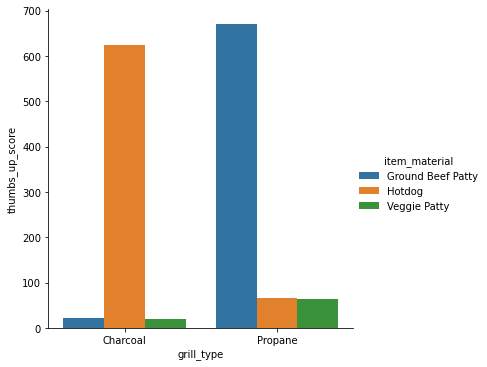

In [210]:
# 6 b. Based on data, which grill is preferred?
df3 = pd.read_csv('grillTypeTasteTest.csv')
x = df3.groupby(['grill_type', 'item_material']).sum()[['thumbs_up_score', 'guess_grill_correct']]
x = x.reset_index()
sns.catplot(data=x, x='grill_type', y='thumbs_up_score', hue = 'item_material', kind='bar')
x
"""
So, we can see from the table and the graph, Ground_beef patty is better suited and voted for Propane, Hot dog is 
highly voted for charcoal and Veggie patty is the closest in terms of votes. So, there is no clear cut or conclusive evidence 
on which type of grill did the best. It is a close bet.
"""

# # 6 c. What factors might play a role?
# """
# The factors that mainly need to be taken into account are Cost as per life span, ease of use, taste. These are the main factors. 
# Additionally, factors like life time to pre-heat, cool/increase temperature, looks might matter, availability of 
# product.
# """




In [157]:
# 7. Please generate an aggregated dataset to present your conclusions
mergedA_B = pd.merge(df1, df2, on='grill_type') # merging SheetA and SheetB
mergedA_B_C = pd.merge(mergedA_B, df3) # merging table resulated from previosu merge and SheetC

In [159]:
df4 = mergedA_B_C.groupby(['grill_type', 'item_material']).sum()[['pre_heat_time', 'fuel_cost_per_meal', 'market_share',
       'easiness_to_use', 'initial_investment',
       'user_satisfaction', 'fuel_cost',
       'thumbs_up_score']] 
# grouping the new merged data on grill type, and item_material and summing the respective columns as mentioned above

df4

# """
# We see a number of conclusions that we can make from this table we have below. The pre-heat-time is lower for propane 
# gas, the fuel-cost-per-meal is lower for propane gas, the market share is more than or more accepted in market, the ease-of-use
# is way better for propane gas, the initial investment is higher than charcoal, user satisfaction is easily better for 
# propane based items, fuel cost is lower for prpane gas and thumbs-up-score is more for again, propane based products.

# So, overall, the propane based products are better when considered as a whole and in aggragated manner. But when we see the 
# individual item_material per grill_type and taste scores are very in-conclusive as sometimes gas based grilled products are 
# better and sometimes propane based food items, its not clear which one actually stands out.
# """

pre_heat_time  fuel_cost_per_meal  market_share  \
grill_type item_material                                                        
Charcoal   Ground Beef Patty         576000               960.0         211.2   
           Hotdog                    576000               960.0         211.2   
           Veggie Patty              576000               960.0         211.2   
Propane    Ground Beef Patty         230400               744.0         307.2   
           Hotdog                    230400               744.0         307.2   
           Veggie Patty              230400               744.0         307.2   

                              easiness_to_use  initial_investment  \
grill_type item_material                                            
Charcoal   Ground Beef Patty             -480               43680   
           Hotdog                        -480               43680   
           Veggie Patty                  -480               43680   
Propane    Ground Beef Patty              960               66720   
           Hotdog                         960               66720   
           Veggie Patty                   960               66720   

                              user_satisfaction  fuel_cost  thumbs_up_score  
grill_type item_material                                                     
Charcoal   Ground Beef Patty             -768.0  191067.48             86.0  
           Hotdog                        -732.0  177225.60           2493.2  
           Veggie Patty                  -636.0  180188.64             77.2  
Propane    Ground Beef Patty             1032.0   82413.00           2681.6  
           Hotdog                         744.0   72714.00            263.6  
           Veggie Patty                   744.0   72549.00            258.4

In [ ]:
# 8. Are your recommendations to the manufacturer different to recommendations you’d make to the user?
"""
Being the client to a specific grill type manufacturer, I would obviously want to make money by selling more devices of a
particular type. I would be honest and look at the previous sales, and forecasted sales for upcoming years. If say, the propane
device isn't sellig well, although they migh b cheaper and might as well be giving better taste and usage results, I would 
obviously recommend users the Propane but the manufacturers need to be told about the facts in numbers and as them to 
maybe slow or reduce production if the sales of a particular type are low even if then the results and market says something
else. My main goal is to make money on th devices I am selling and at the end of the day, ask the manufacturer of the device
that is selling more. But will surely recommend the users whcih one are giving better market results. So, it is a tradee off
and yes, my recommendations will be different to the user and the amnufacturer.
"""

In [144]:
# 9. Transform SheetC.json to SheetC.csv

with open('SheetC.json') as json_file: # opening the json file 
    data = json.load(json_file) # getting the data in a variable by reading json data
a = data[0]['test_result'] # getting into the list of dictionary and getting rid of the 'test_result' attribute we didn't want

# the required lists will have values for the repective columns
sample_item_index = []
item_material = []
is_frozen = []
grill_type = []
thumbs_up_score = []
guess_grill_correct = []


a_json = json.loads(a) # converting json string to python dictionary


for key, value in a_json.items(): # getting the key value pair in the dictionary
    for k, v in value.items(): # getting further the key value in the values dictionary
        if k == 'meta_data': # filtering data that we do not want as headers or values
            grill_type.append(v['grill_type'])
            is_frozen.append(v['is_frozen'])
            item_material.append(v['item_material'])
        if k == 'sample_item_index':
            sample_item_index.append(v)
        if k == 'survey_result':
            guess_grill_correct.append(v['guess_grill_correct'])
            thumbs_up_score.append(v['thumbs_up_score'])   

[1, 10, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 11, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 12, 30, 1, 2, 3, 4, 5, 6, 7, 8, 9, 13, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 14, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 15, 30, 1, 2, 3, 4, 5, 6, 7, 8, 9, 16, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 18, 30, 1, 2, 3, 4, 5, 6, 7, 8, 9, 19, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2, 20, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 21, 30, 1, 2, 3, 4, 5, 6, 7, 8, 9, 22, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 23, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 24, 30, 1, 2, 3, 4, 5, 6, 7, 8, 9, 25, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 26, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 27, 30, 1, 2, 3, 4, 5, 6, 7, 8, 9, 28, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 29, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3, 30, 30, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3, 30, 1, 2, 3, 4, 5, 6, 7, 8, 9, 4, 10, 11

In [147]:
import pandas as pd
  
# specifying the column names aas required in the final csv
col_names =  ['sample_item_index', 'item_material', 'is_frozen', 'grill_type', 'thumbs_up_score', 'guess_grill_correct']

# creating an empty dataframe with the specified columns
my_df  = pd.DataFrame(columns = col_names)

# specifying the lists respective to each column that hold all values for each column
my_df = pd.DataFrame({'sample_item_index': sample_item_index, 
                      'item_material': item_material, 
                      'is_frozen': is_frozen, 
                     'grill_type':grill_type, 
                     'thumbs_up_score': thumbs_up_score, 
                     'guess_grill_correct': guess_grill_correct}, ) 

# finally converting all data to csv
my_df.to_csv('FinalConvertedData.csv', index=False)